In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from extractBofs import *
import PCD_Image_Processor


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


INFO - 2022-02-22 21:19:07,681 - utils - NumExpr defaulting to 8 threads.


In [2]:
file = "/home/mario/Documents/Code/Proyecto_AYDUAME_Testing/rgbd_dataset_freiburg2_pioneer_slam/pcd/1311878197.974019.ply"
axis=2;method=1;layers=4
floor_plane=(0,1,0.11,0.57)

pcd = o3d.io.read_point_cloud(file)
data = np.asarray(pcd.points)

# Si se envió un plano del piso
if floor_plane:
    A, B, C, D = floor_plane
    # Ecuación del plano con "y" despejada
    y_plane = -A/B * data[:,0] - C/B * data[:,2] - D/B
    above_floor = data[:,1] > y_plane
    data = data[above_floor]

In [3]:
capas=cortaCapas(data,nCapasOintervalo=layers,metodo=method,eje=axis)

In [4]:
capas

[array([[-1.58506281,  0.29879999],
        [-1.58506281,  0.29310856],
        [-1.58506281,  0.28741713],
        ...,
        [-1.15934017, -0.11938285],
        [-1.15403426, -0.11938285],
        [-1.14872836, -0.11938285]]),
 array([[-0.73711216,  0.52861122],
        [-0.74024992,  0.53263392],
        [-0.7377783 ,  0.53263392],
        ...,
        [-0.75963393, -0.41799278],
        [-0.75704574, -0.41799278],
        [-0.75745581, -0.4196539 ]])]

In [5]:
pcd = np.asarray(capas[1])
img = PCD_Image_Processor.pcd_2_image(pcd=pcd,pixels_height=150)

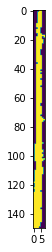

In [6]:
plt.imshow(img)

In [7]:
img.shape

(150, 8)

In [8]:
y_max = np.max(pcd[:,1])
y_min = np.min(pcd[:,1])
x_max = np.max(pcd[:,0])
x_min = np.min(pcd[:,0])

In [9]:
y_max - y_min

0.9673112469627745

In [10]:
x_max - x_min

0.04723011119025089

In [11]:
aspect_ratio = round((x_max - x_min) / (y_max - y_min),2)

In [12]:
(x_max - x_min) / (y_max - y_min)
aspect_ratio

0.05

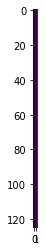

In [13]:
img2 = np.zeros((125,2))
plt.imshow(img2)

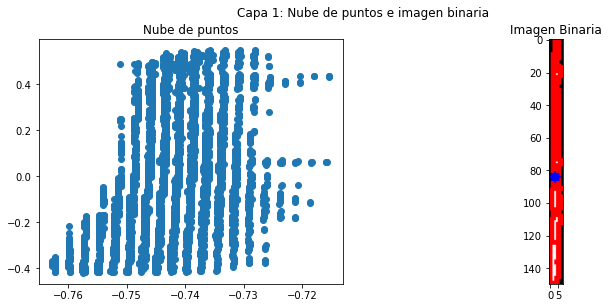

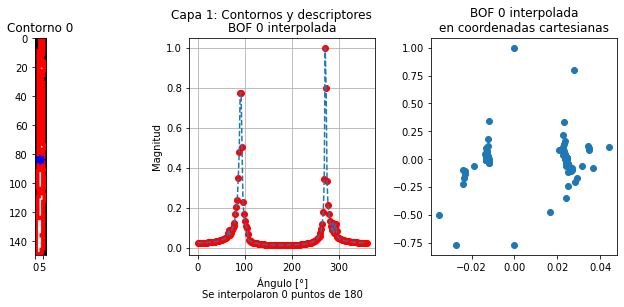

In [14]:
bofs = extractBofs(file="/home/mario/Documents/Code/Proyecto_AYDUAME_Testing/rgbd_dataset_freiburg2_pioneer_slam/pcd/1311878197.974019.ply",method=1,layers=4,axis=2,plotBof=True,
    floor_plane=(0,1,0.11,0.57)
)